# **Clustering Algorithms Demonstration**

Clustering is a fundamental technique in machine learning and data analysis that involves grouping similar data points together based on intrinsic patterns or features, without prior knowledge of specific categories. By identifying inherent structures within datasets, clustering algorithms reveal meaningful relationships and dependencies, providing valuable insights into the underlying organization of the data. Unlike supervised learning methods, clustering operates in an unsupervised manner, making it particularly useful for exploring datasets where the labels or groupings are unknown. Common applications of clustering span a wide range of domains, from customer segmentation in marketing to image segmentation in computer vision, showcasing its versatility in uncovering hidden structures within diverse datasets. As a key component of unsupervised learning, clustering plays a pivotal role in organizing and simplifying complex datasets, aiding researchers and analysts in making sense of intricate patterns and relationships.

In this notebook all 10 scikit-learn clustering methods ( available right [here](https://scikit-learn.org/stable/modules/classes.html) ) will be explained and applied over this exercise [dataset](https://www.kaggle.com/datasets/joonasyoon/clustering-exercises?select=basic3.csv).

## Loading Dataset

### Libraries used

In [68]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../src')

# %matplotlib inline
from graphic import Graphic
from modeller import Modeller

sys.path.remove('../src')

### Loading

Loading every single csv file in `dataset` folder as a `pandas.DataFrame` into the dictionary `dataframes`

In [2]:
base_path = '../dataset/'

files = [
    'basic1', 'basic2', 'basic3', 'basic4', 'basic5', 'blob',
    'box', 'boxes', 'boxes2', 'boxes3', 'chrome', 'dart',
    'dart2', 'face', 'hyperplane', 'isolation', 'lines', 'lines2',
    'network', 'outliers', 'ring', 'sparse', 'spiral', 'spiral2',
    'spirals', 'supernova', 'triangle', 'un', 'un2', 'wave',        
]

dataframes = {}
for file in files:
    dataframes[file] = pd.read_csv(base_path + file + '.csv')
    
    # This is necessary because it must exist a 'labels'
    # key in df, for Graphic methods to work
    dataframes[file]['labels'] = dataframes[file]['color']
    del dataframes[file]['color']


# Initializing the Graphic class
g = Graphic()

## Visualizing Data

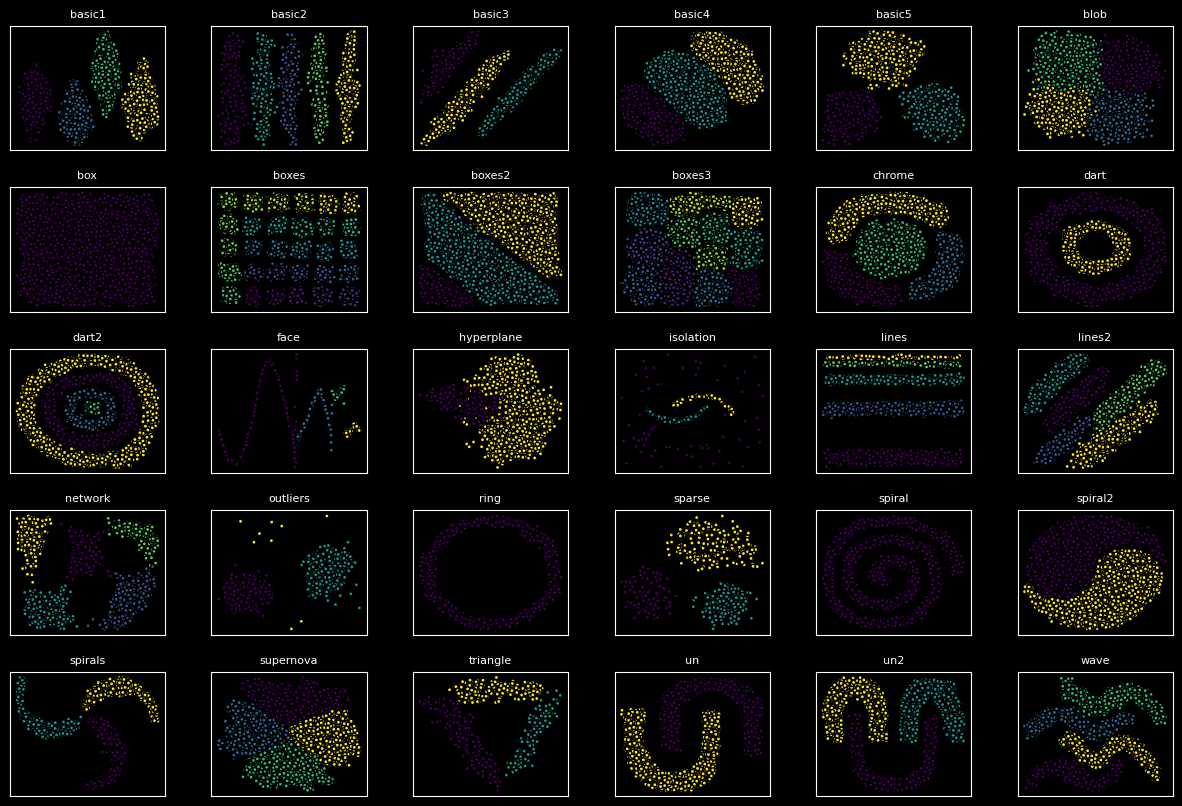

In [ ]:
g.sample_many(dataframes=dataframes, nrows=5, ncols=6)

Here is possible to visualize what every single one of the samples looks like. It is also possible to notice that the `face` sample has gone rogue. This is due to an extra dimension in the data frame. It is also valid to notice that the same concept applies to the `hyperplane` sample, where a dimensionality reduction will be needed for future 2-dimensional or 3-dimensional visualizations. In fact, the great majority of data mining processes and products are applied over n-dimensional spaces, due to the high number of attributes extracted.

Below there is the correct 2-dimensional visualization of `face` sample:

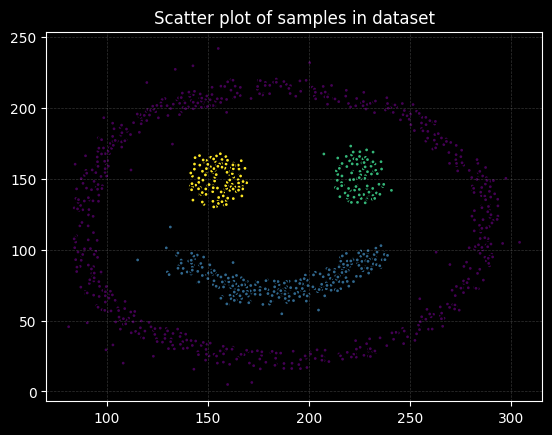

In [4]:
face = dataframes['face'].drop(dataframes['face'].columns[0], axis=1)
g.sample(face, face['labels'])

## K-Means

The `K-Means` algorithm ( aka. `Lloyd's` algorithm ) is a representative-based Clustering technique. It works by finding `k` groups, each one with a representative point that summarized the cluster, called `centroid`. The `Lloyd's` algorithm ( which is a subset of all `K-Means` techniques ), finds the `centroids` by making a mean of all the points in the cluster:

$$\Large \mu_i = \frac{1}{n_i} \sum_{x_j \in C_i}x_j$$

Let a Clustering $C$ be a set of clusters $C = { C_0, C_1, ... C_n }$. To evaluate it's goodness it is used the Sum of Squared Errors ( `SSE` ) scoring function:

$$\Large SSE(C) = \sum_{i = 1}^{k} \sum_{x_j \in C_i} || x_j - \mu_i||^2$$

The goal is to find the clustering $C$ that minimizes the SSE score:

$$\Large C^* = \argmin_{C}( SSE(C) )$$

`K-means` employs a greedy iterative approach to find a clustering that minimizes the SSE objective. However, it can converge to a local optimum instead of a globally optimal clustering. `K-means` initializes the cluster means by randomly generating `k` points in the data space. This is typically done by generating a value uniformly at random within the range for each dimension. Each iteration of `K-means` consists of two steps: (1) cluster assignment, and (2) centroid update. Given the `k` cluster means, in the cluster assignment step, each point $x_j \in D$ is assigned to the closest mean, which induces a clustering, with each cluster $C_i$ comprising points that are closer to $\mu_i$​ than any other cluster mean. In other words, each point $x_j$​ is assigned to cluster $C_{i^∗}$​, where $i^*$ is the index of the closest `centroid`.

It has complexity $O(t n k d)$, being `t` each iteration, `n * k * d` the number of calculations between every point `n` to every `centroid k ` in every dimension `d`.

`K-Means` is one of the fastest clustering algorithms available, but it's main drawback is the inability of correctly clustering non linear separable datasets. Other disadvantages of using `K-Means` is that it forces samples to make part of a clustering, and thus, is vulnerable to outliers. The first drawback ( linear separability restricted ), can be largely solved by using `Kernel` methods, transfering the input space to high-dimensional feature spaces. This will be demonstrated later.


In [22]:
samples_to_use = [('basic1', 4), ('basic2', 5), ('basic4', 3), ('dart2', 4), ('triangle', 3)]
model = Modeller()

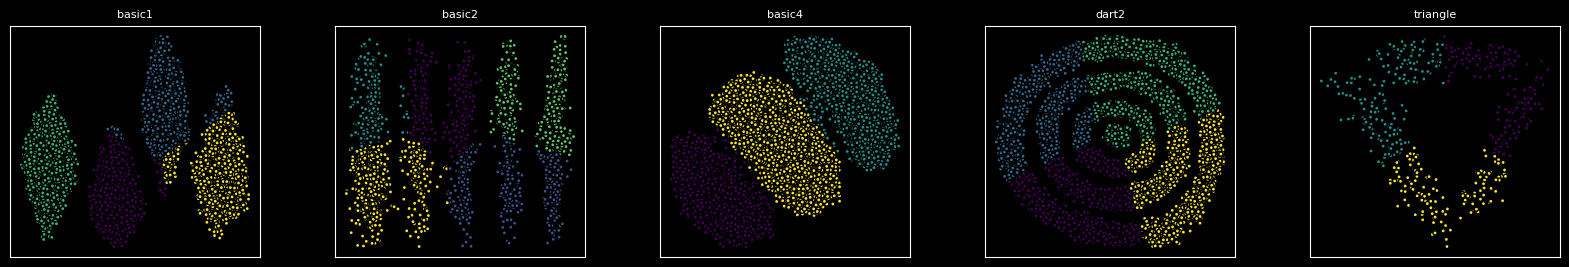

In [10]:
buffer = {}
labels = {}
for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.kmeans(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## Gaussian Mixture ( Gaussian Kernel for K-Means )

As it was sad before, the linear `K-Means` isn't capable of correctly clustering non linear separable samples. This can be spotted on `dart2` sample above. It is also valid to mention, that a linear separable sample may not be well clusterized as `basic2` and `triangle` show above. This happens, because the centroids try to minimize its distance to every single point in the cluster. Thus, every close stratches in the sample, will have it's ends further from the `centroid` than the points in the adjacent stratch.

However, such problem can be circumvented with the adoption of the `Kernel` method, utilizing a gaussian distribution, instead of the eucliadean distance. The $SSE$ is defined by:

$$\Large SSE(C) = \sum_{j = 1}^{n} K(x_j, x_j) - \sum_{i = 1}^{k} \frac{1}{n_i} \sum_{x_a \in C_i} \sum_{x_b \in C_i} K(x_a, x_b)$$

And to find $C^*$:

$$\Large C^*(x_j) = \argmin_{i} (  \frac{1}{n^2} \sum_{x_a \in C_i} \sum_{x_b \in C_i} K(x_a, x_b) - \frac{2}{n_i} \sum_{x_a \in C_i} K(x_a, x_j)  )$$

To demonstrate the gaussian kernel, it will be used the `GaussianMixture` class from `sklearn`.

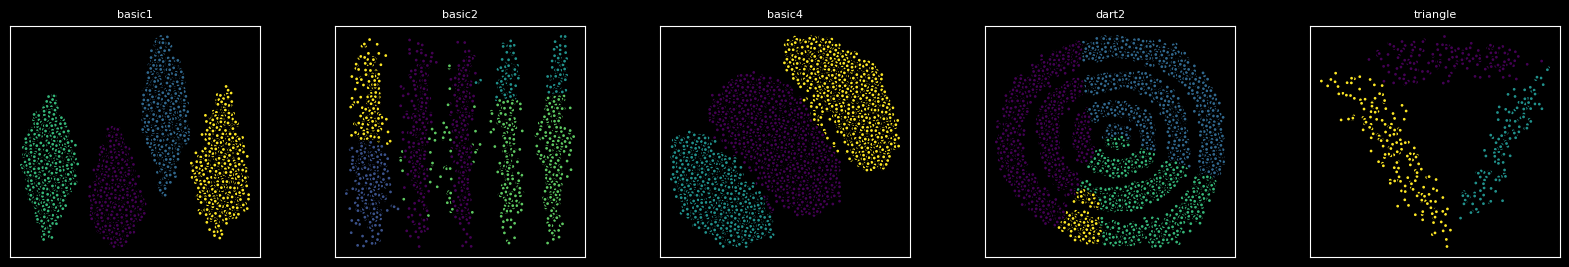

In [21]:
buffer = {}
labels = {}
for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.gmixture(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

It stills lack some predictability capacity, but it is way more robust than the `Lloyd's` algorithm in instances `basic1` and `triangle`. It is also possible to evaluate its capacity to make clusters out os linear groups of samples, as demonstrated in examples `basic2` and `triangle`.

## Bisecting K-Means

`Bisecting K-Means` is a clustering algorithm that shares similarities with the traditional `K-Means` algorithm, yet diverges in its approach to partitioning data into clusters. This algorithm is particularly notable for its hierarchical nature, as it employs a divisive strategy to recursively divide the noisiest clusters into subclusters until reaching the desired number of clusters `k`. The Bisecting process is a top-down approach for dealing with the problem, and it offer some advantages over the traditional `Lloyd's Algorithm`.

One of the key advantages of `Bisecting K-Means` is its robustness to the initial choice of `centroids`, as the hierarchical nature of the algorithm helps to mitigate the impact of suboptimal initializations. Additionally, the hierarchical clustering structure provides a natural hierarchy of clusters, which can be valuable in scenarios where understanding the data at different granularity levels is essential.

In [5]:
samples_to_use = [('boxes', 30), ('boxes3', 13), ('network', 5), ('box', 8), ('supernova', 4), ('triangle', 3)]

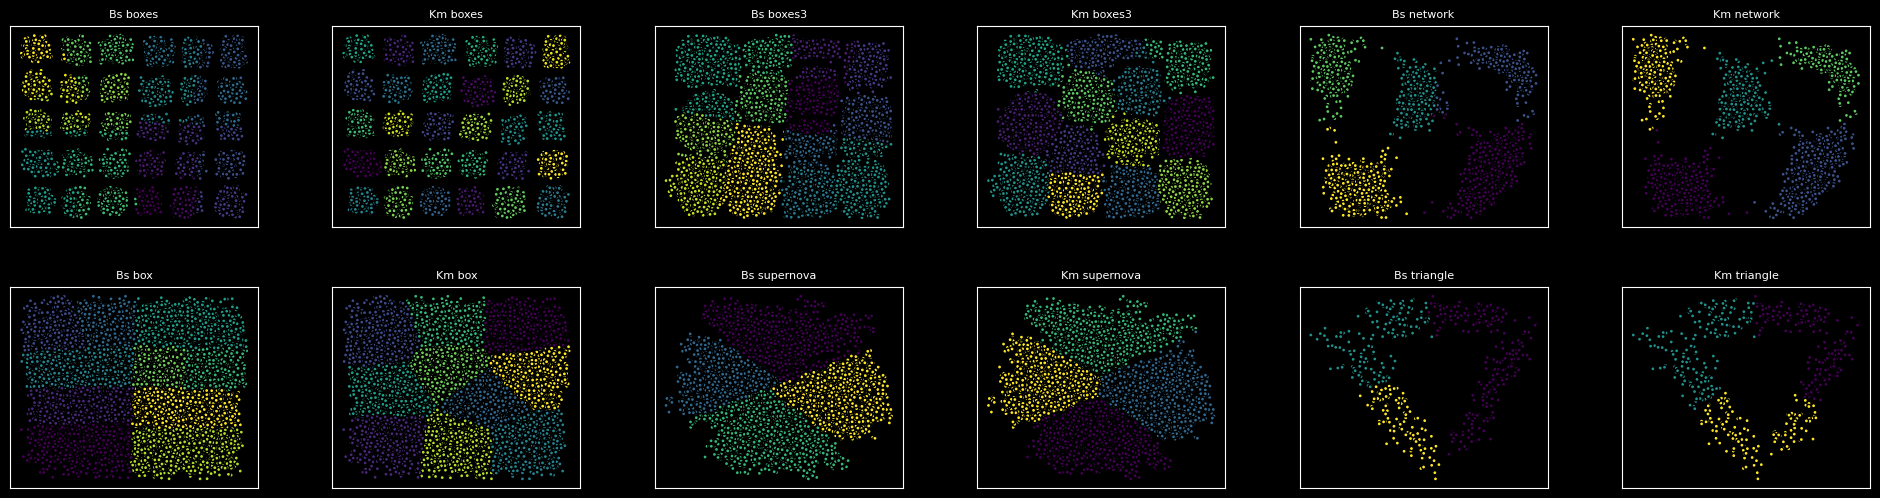

In [10]:
buffer = {}

for sample, k in samples_to_use:
    str1 = f"Bs {sample}"
    str2 = f"Km {sample}"
    buffer[str1], _, _ = model.bskmeans(dataframes[sample], k, copy=True)
    buffer[str2], _, _ = model.kmeans(dataframes[sample], k, copy=True)

g.sample_many(buffer, nrows=2, ncols=6, figsize=(24, 6))

On example `box`, where there is only one cluster, the difference between the implementations is easily noticeable. An arbitrary number `k = 8` was chosen for both methods. The bottom-up `Lloyd's` algorithm approach does not maintain a rectilinear structure, while the top_down `Bisecting` approach does.

## DBSCAN

Density-Based Spatial Clustering of Applications with Noise (`DBSCAN`) is a powerful clustering algorithm that distinguishes itself from traditional methods like `K-Means` by its ability to identify clusters based on the density of data points in the feature space. DBSCAN does not rely on predefined cluster centroids and is particularly effective in discovering clusters of arbitrary shapes. The algorithm is robust in handling noise and outliers, offering a flexible approach to cluster analysis.

So DBSCAN differs from many other clustering algorithms in 3 very important aspects:
* It is able to discovery the optimal number of clusters by itself
* It is able to handle outliers
* It can clusterize weird, complex, and non trivial shapes

Given a dataset `D`, the algorithm works by defining a `neighborhood` $N_e (x)$ set for each point $x_i \in D$. In this example, the distance is given by the `Euclidean` distance, but it can be any other distance metric.

$$\Large N_e (x) = \{ y \in D \mid \lVert x - y \rVert \leq e \; \land \; y \neq x \} $$

Each point is then labeled one of three options: A core point, a border point, or an outlier. A point $x_i$ is a core, and as such $x_i \in Cores$, if exists a `minpts` variable, such that, if $|N_e(x_i)| \geq minpts$.  Else, if $|N_e(x_i)| \lt minpts$, and $\nexists y \in N_e(x_i) \; y \in Cores$, then $x_i$ is a border point. Else it is a outlier, and do not belong to any density area.

We say that a point $x_i$ is Density reachable, if $\exists y \in N_e(x_i) \; y \in Cores$. A chain of density reachable cores, are considered a `Cluster`.



In [4]:
samples_to_use = [('basic1', 14.5), ('basic2', 18.8), ('basic4', 9.5), ('dart2', 9.5), ('triangle', 14.5)]

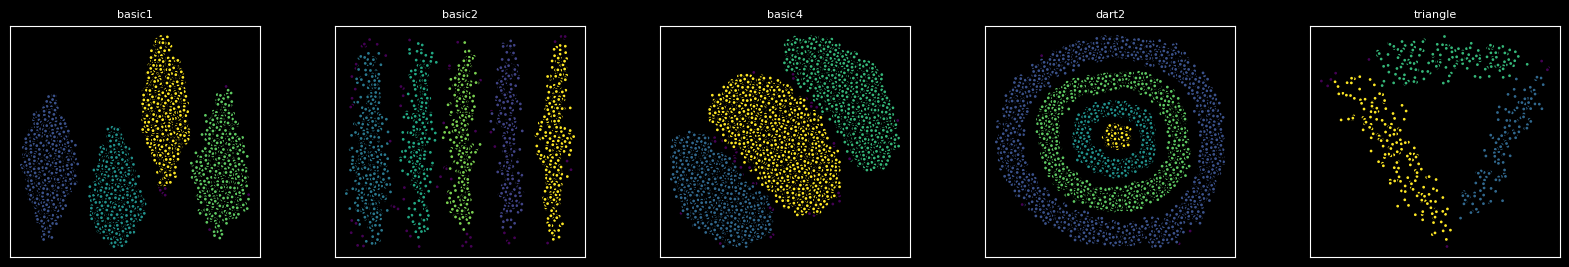

In [48]:
buffer = {}
labels = {}
for sample, eps in samples_to_use:
    buffer[sample], labels[sample], _ = model.dbscan(dataframes[sample], eps, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

As one might have expected, the DBSCAN correctly and efficiently predicted every single one of the samples presented to him, almost as a human would make. It is indeed a very powerful algorithm. Nevertheless, caution is necessary when dealing with DBSCAN, since it is very sensitive to the parameters `epsilon`, and `minpts`.

## HDBSCAN

Hierarchical Density-Based Spatial Clustering of Applications with Noise (`HDBSCAN`) is an extension of the previously demonstrated `DBSCAN` algorithm, designed to address some of its limitations and provide a more versatile and adaptive approach to clustering in high-dimensional spaces. `HDBSCAN` is particularly useful for discovering clusters of varying shapes and densities within datasets, as it's predecessor, but with a higher resistance to hiperparameters, making it less sensitive to it's configurations. In other words, it is easier to use with efficacy, which might come very handy when dealing with complex, multidimensional data.

It works by creating a Mutual Reachability Graph (`MRG`), which is made by connecting every two mutually reachable points together, and then calculating the Minimum Spanning Tree (`MST`) of `MRG`. Once `MST` is done, the algortihm condenses the tree into a cluster hierarchy, taken in consideration the density of each point neighbourhood. After all this process the `HDBSCAN` determinate the optimal cluster by making many cuts from the hierarchy tree, and testing the cluster stability for each slice. The most stable flat clustering is then chosen as the final answer. 

_Not many equations for us this time. Check more about here: https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html_

In [10]:
samples_to_use = [('basic1', 6.5), ('basic2', 15.0), ('basic4', 6.5), ('dart2', 6.5), ('triangle', 6.5)]

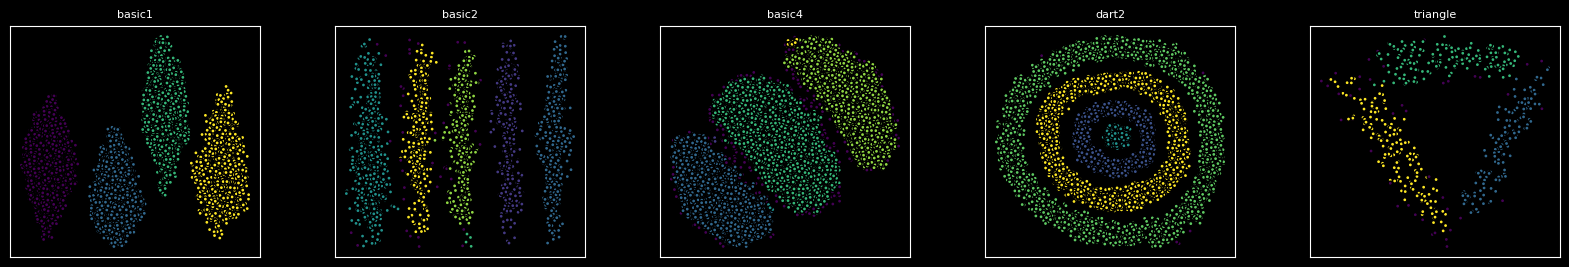

In [5]:
buffer = {}
labels = {}
for sample, eps in samples_to_use:
    buffer[sample], labels[sample], _ = model.hdbscan(dataframes[sample], eps, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## Affinity Propagation

In [1]:
samples_to_use = [('dart2', 6.5)]

In [ ]:
buffer = {}
labels = {}
model.config(affprop_max_iter=30)

for sample, eps in samples_to_use:
    buffer[sample], labels[sample], _ = model.affprop(dataframes[sample], sample)

g.sample_many(buffer, nrows=1, ncols=1, figsize=(20, 3))

## Agglomerative Clustering

There exisits two great distinct groups of clustering methods: Flat Clustering, and Hierarchical Clustering. The Flat group encompass all the algorithms where the scientist have to give the number of desired clusters to the machine, in order to divide the data. Hierarchical, on the other hand, determines how many clusters the final solution will have, according to it's own algorithmic structure. The Hierarchical approach creates a tree-like representation, called dendogram, which can expose the hierarchical relationships between clusters, making it possible to evaluate the results under many levels of detail ("levels of detail" refers to the number of clusters `k`. As bigger as it gets, more sample specific are the clusters), with as many clusters as feasible. There are two main ways of achieving a hierarchical clustering structure: The `divisive` methods, and the `agglomerative` methods. As the name sugests, the `divisive` method is a top-down approach, that starts with a single general cluster, and divides it's structure iteratively until it reached maximum specificity. As for the `agglomerative`, it implements a bottom-up approach, that merge clusters together, from minimum generality, to maximum generality (minimum specificity).

Formally, given a clustering $C$ with all the clusters in the solution, the agglomerative approach starts in a state where:
 $$\Large \forall_{x_i \in D } \; \exists_{C_i \in C} \; \{ x_i \in C_i \, \land \, \forall_{y_i \in D} \; \{ y_i \neq x_i \rightarrow y_i \notin C_i \} \}$$

The algorithm than proceeds to merge the closest pair of clusters $C_i$ and $C_j$ in $C_{ij}$ (according to a given metric that can be chosen by the scientist), and assign it to $C = (C \setminus \{C_i \,, C_j\} \cup \{C_{ij}\})$

Some of the commom 'closest cluster metrics' are:

* $L_2$-Norm (Euclidean Distance): $\lVert x - y \rVert$
* Single Link: Uses the Euclidean Distance, and take in consideration only one pair of points, that being the closest pair of any two clusters
* Complete Link: Uses the Euclidean Distance, and take in consideration only one pair of points, that being the furthest pair of any two clusters (in theory that makes sure every point in those two clusters are taken into consideration)
* Group Average: Uses the Euclidean Distance, and take in consideration the average pairwise distance between any two clusters
* Mean Distance: Uses the Euclidean Distance, and take in consideration the distance between any two clusters centroids
* Ward's Method: The distance between two clusters is defined as the increa se in the sum of squared errors (`SSE`) when the two clusters are merged. The `SSE` for a single cluster is given as:
$$\Large SSE_i = \sum_{x \in C_i} \lVert x - \mu_i \rVert ^2$$
The `SSE` for a clustering $C = \{C_1, \, ..., \, C_m\}$ is equal to:
$$\Large SSE = \sum_{i = 1}^{m}SSE_i$$
Ward’s measure defines the distance between two clusters $C_i$ and $C_j$ as the net change in the `SSE` value when we merge $C_i$ and $C_j$ into $C_{ij}$, given as:
$$\Large SSE_{ij} - SSE_i - SSE_j$$

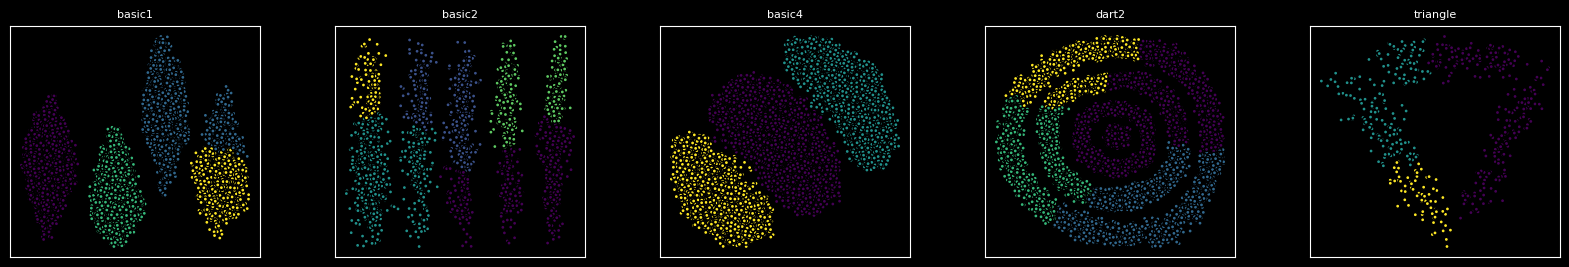

In [4]:
buffer = {}
labels = {}

for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.agcluster(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## Birch

The `Birch` (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm is a hierarchical clustering method designed for efficient and scalable clustering of large datasets. Introduced by Tian Zhang, Raghu Ramakrishnan, and Miron Livny in 1996, `Birch` is particularly well-suited for scenarios where datasets may not fit into memory, and computational efficiency is crucial. The algorithm employs a tree-based hierarchical structure to represent clusters, but in a way that makes it more memory-efficient, and capable of processing data in a single pass.

The `Birch` algorithm works by creating a Clustering Feature (`CF`) that is composed of a triple (N, LS, SS), being N te number of data points in the cluster, LS the the linear sum of the points in the cluster, and SS the square sum of the N points in the cluster. The `CF` has a additive nature, where it’s possible to have `CFs` composed of other `CFs`. In this case, the subcluster is equal to the sum of the `CFs`.

More about Birch [here](https://www.coryjmaklin.com/2019-07-01_BIRCH-Clustering-Algorithm-Example-In-Python-fb9838cbeed9/)


In [5]:
samples_to_use = [('basic1', 4), ('basic2', 5), ('basic4', 3), ('dart2', 4), ('triangle', 3), ('boxes', 30), ('boxes3', 13), ('network', 5), ('box', 8), ('supernova', 4)]

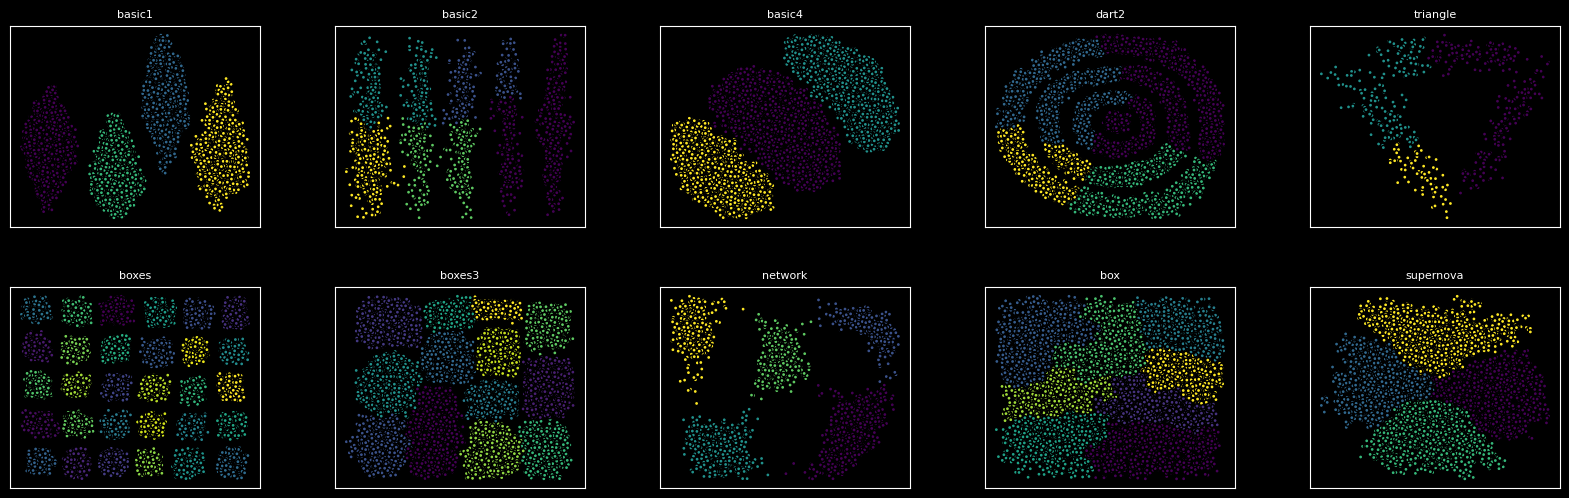

In [6]:
buffer = {}
labels = {}

for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.birch(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=2, ncols=5, figsize=(20, 6))

### _Mini Batch K-Means_

## Mean Shift

In [ ]:
buffer = {}
labels = {}

for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.meanshift(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## OPTICS

In [57]:
samples_to_use = [('basic1', 12.5), ('basic2', 17.5), ('un2', 8.5), ('dart2', 9), ('triangle', 10.1)]

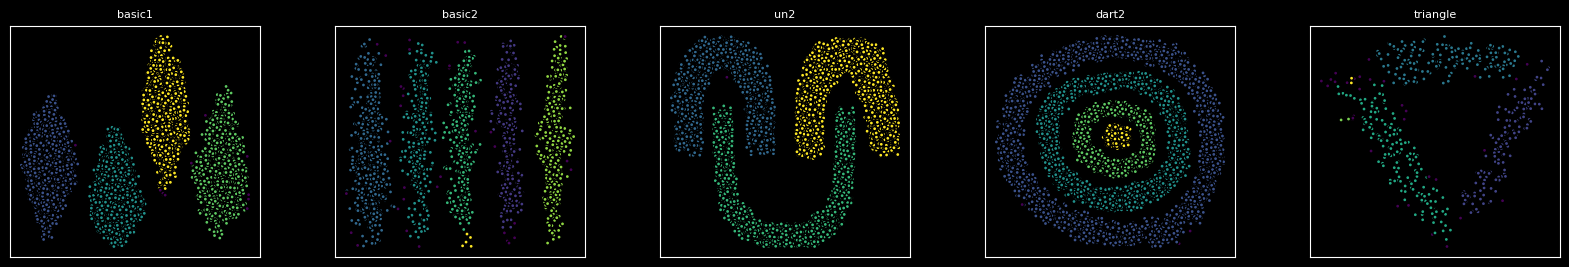

In [58]:
buffer = {}
labels = {}

model.config(optics_max_eps=20, optics_metric='euclidean', optics_cluster_method='dbscan')
for sample, eps in samples_to_use:
    buffer[sample], labels[sample], _ = model.optics(dataframes[sample], eps, key=sample, save=True)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

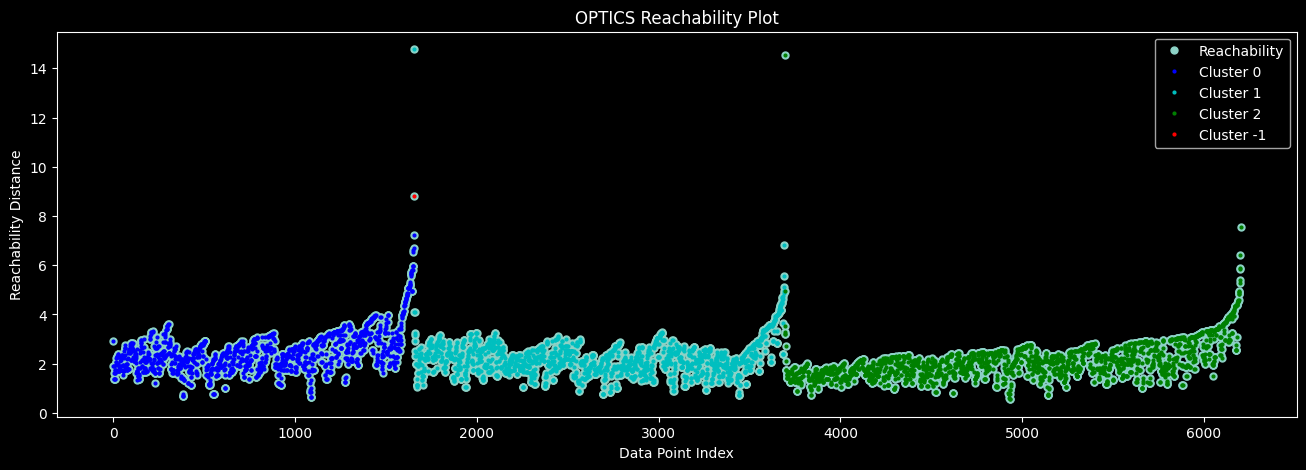

In [90]:
opt_model = model.cache['un2']
reach   = opt_model.reachability_[opt_model.ordering_]
rlabels = opt_model.labels_[opt_model.ordering_]
plt.figure(figsize=(16, 5))

plt.plot(reach, marker='o', linestyle='None', markersize=5, label='Reachability')

colors = ['b.', 'c.', 'g.', 'r.']
for cluster_label, color in zip(set(rlabels), colors):
    cluster_indices = np.where(rlabels == cluster_label)[0]
    plt.plot(cluster_indices, reach[cluster_indices], color, markersize=4, label=f'Cluster {cluster_label}')

plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Reachability Distance')
plt.legend()
plt.show()

## Spectral Clustering

In [ ]:
buffer = {}
labels = {}

for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.spcluster(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

### _Spectral Biclustering_

### _Spectral Coclustering_

## Feature Agglomeration

In [ ]:
buffer = {}
labels = {}

for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.featagg(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## Dimensional Reduction & Algorithmic Comparisons